Exploratory Data Analysis on Reddit 'cars' dataset



Data Inspection

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('vehicle_features.csv')
print(df.head(10))

   Unnamed: 0  stockNumber                vin  year      make     model  \
0           0     24592442  1N4AA6AP3HC407486  2017    Nissan    Maxima   
1           1     23884887  1G6DJ1E36C0134929  2012  Cadillac       CTS   
2           2     24176587  1C4NJCBA0ED642552  2014      Jeep   Compass   
3           3     24438780  3N1AB8CV8LY301312  2020    Nissan    Sentra   
4           4     24675986  7SAYGDEF2NF538729  2022     Tesla   Model Y   
5           5     24233622  2C3CDXCT8KH562411  2019     Dodge   Charger   
6           6     22139598  3C4NJCAB0JT107039  2018      Jeep   Compass   
7           7     24675724  KM8K12AA7LU579456  2020   Hyundai      Kona   
8           8     24638853  JTHKD5BH9H2295644  2017     Lexus   CT 200h   
9           9     24574771  ZACCJABW0GPD15600  2016      Jeep  Renegade   

               body         trim  basePrice  msrp  ...  bestFinanceDecision  \
0          4D Sedan           SV    23998.0   NaN  ...                  NaN   
1          2D Co

In [3]:
df.describe(include = 'all')  # 'include' keeps quantitative and categorical variables

,Unnamed: 0,stockNumber,vin,year,make,model,body,trim,basePrice,msrp,...,bestFinanceDecision,store,featureScore,vehicleSize,packages,types,series,isSavedCar,heroImageUrl,heroThumbnailImageUrl
count,3483.000000,3.483000e+03,3483,3483.000000,3483,3483,3483,3168,3483.000000,0.0,...,0.0,3483,3258.000000,0.0,3483,0.0,288,3483,3483,0.0
unique,NaN,NaN,3478,NaN,35,387,18,328,NaN,NaN,...,NaN,12,NaN,NaN,109,NaN,47,1,3478,NaN
top,NaN,NaN,2HKRM3H30FH504605,NaN,Ford,F150,4D Sport Utility,SE,NaN,NaN,...,NaN,"{'id': 7154, 'name': 'Austin North', 'city': N...",NaN,NaN,[],NaN,3-SERIES,False,https://img2.carmax.com/assets/23890249/hero.j...,NaN
freq,NaN,NaN,2,NaN,405,99,1477,251,NaN,NaN,...,NaN,703,NaN,NaN,2883,NaN,27,3483,2,NaN
mean,1741.000000,2.473939e+07,NaN,2018.577089,NaN,NaN,NaN,NaN,27990.832328,NaN,...,NaN,NaN,6.128300,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1005.599821,3.807344e+05,NaN,2.783601,NaN,NaN,NaN,NaN,10021.640500,NaN,...,NaN,NaN,2.162309,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.977827e+07,NaN,2012.000000,NaN,NaN,NaN,NaN,9998.000000,NaN,...,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,870.500000,2.463100e+07,NaN,2017.000000,NaN,NaN,NaN,NaN,20998.000000,NaN,...,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1741.000000,2.484641e+07,NaN,2019.000000,NaN,NaN,NaN,NaN,25998.000000,NaN,...,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2611.500000,2.500653e+07,NaN,2021.000000,NaN,NaN,NaN,NaN,32998.000000,NaN,...,NaN,NaN,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3483 entries, 0 to 3482
Data columns (total 77 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   3483 non-null   int64  
 1   stockNumber                  3483 non-null   int64  
 2   vin                          3483 non-null   object 
 3   year                         3483 non-null   int64  
 4   make                         3483 non-null   object 
 5   model                        3483 non-null   object 
 6   body                         3483 non-null   object 
 7   trim                         3168 non-null   object 
 8   basePrice                    3483 non-null   float64
 9   msrp                         0 non-null      float64
 10  mileage                      3483 non-null   int64  
 11  storeId                      3483 non-null   int64  
 12  storeName                    3483 non-null   object 
 13  storeCity         

In [5]:
# columns with no values
cols_to_drop = df.columns[df.isnull().all()].tolist()
print(cols_to_drop)
# drop these columns from dataframe
df = df.drop(columns=cols_to_drop)

['msrp', 'repairPalData', 'badgeTitles', 'normalizedExteriorColor', 'normalizedInteriorColor', 'review', 'storeZip', 'isUnavailable', 'isMarkdown', 'currentMarkdown', 'fuelType', 'comingSoonDate', 'recommendationType', 'lenderOffers', 'bestFinanceDecision', 'vehicleSize', 'types', 'heroThumbnailImageUrl']


In [6]:
sorted_makes = df["make"].unique().tolist()
sorted_makes.sort()
print(sorted_makes)

df["make"].value_counts(normalize=True).sort_values(ascending=False).head(10)

['Acura', 'Audi', 'BMW', 'Buick', 'Cadillac', 'Chevrolet', 'Chrysler', 'Dodge', 'Fiat', 'Ford', 'GMC', 'Genesis', 'Honda', 'Hyundai', 'Infiniti', 'Jaguar', 'Jeep', 'Kia', 'Land Rover', 'Lexus', 'Lincoln', 'Mazda', 'Mercedes-Benz', 'Mini', 'Mitsubishi', 'Nissan', 'Porsche', 'Ram', 'Scion', 'Smart', 'Subaru', 'Tesla', 'Toyota', 'Volkswagen', 'Volvo']


make
Ford          0.116279
Toyota        0.103359
Chevrolet     0.084697
Nissan        0.083262
Honda         0.064599
Hyundai       0.058570
Kia           0.053115
Jeep          0.048234
Volkswagen    0.038760
BMW           0.033592
Name: proportion, dtype: float64

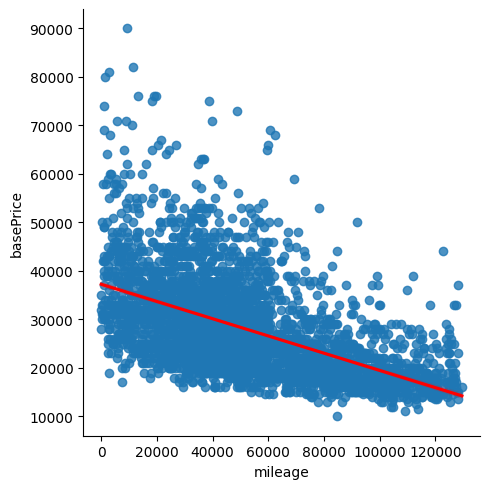

In [7]:
sns.lmplot(data=df, x="mileage", y="basePrice", line_kws={"color": "red"},) 

Data Cleaning

In [8]:
df.isnull().sum()

Unnamed: 0                        0
stockNumber                       0
vin                               0
year                              0
make                              0
model                             0
body                              0
trim                            315
basePrice                         0
mileage                           0
storeId                           0
storeName                         0
storeCity                         0
geoCity                           0
state                             0
stateAbbreviation                 0
averageRating                     0
numberOfReviews                   0
imageCount                        0
newTireCount                      0
isNew                             0
isNewArrival                      0
isTransferable                    0
isOnRemoteLot                     0
isSaleableByAppointmentOnly       0
features                          0
highlightedFeatures               1
highlights                  

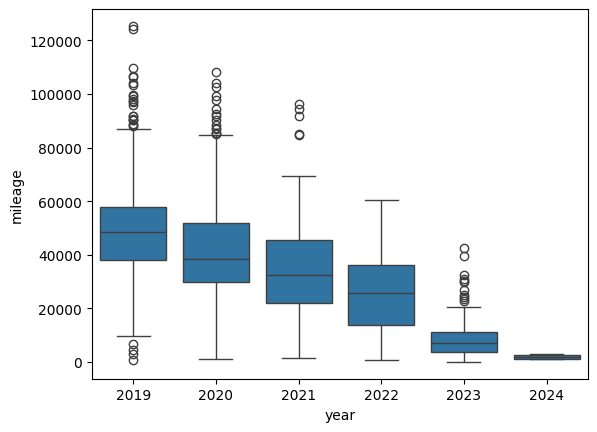

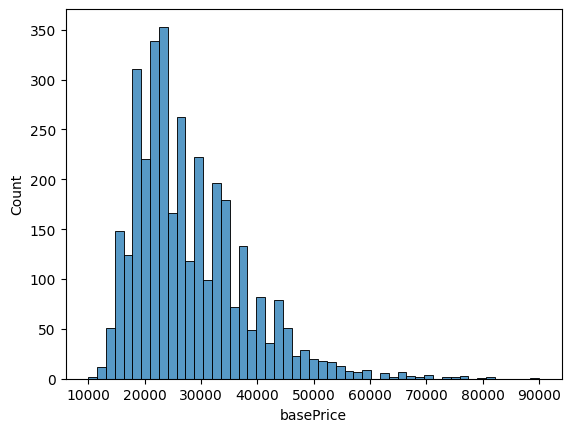

In [9]:
# Boxplot for Mileage 
df_newest_5_years = df[df["year"] >= 2019]   # focusing on past 5 years
sns.boxplot(x='year',y='mileage',data = df_newest_5_years,)
plt.show()
plt.close()

# Histogram for Base Price
sns.histplot(x='basePrice', data = df)
plt.show()
plt.close()

             make  count
0            Ford    405
1          Toyota    360
2       Chevrolet    295
3          Nissan    290
4           Honda    225
5         Hyundai    204
6             Kia    185
7            Jeep    168
8      Volkswagen    135
9             BMW    117
10          Dodge    111
11  Mercedes-Benz    109
12            Ram    106
13           Audi     91
14            GMC     71
15          Mazda     71
16         Subaru     68
17          Lexus     62
18       Infiniti     51
19       Cadillac     48
20       Chrysler     46
21          Acura     40
22          Buick     38
23     Mitsubishi     37
24          Volvo     29
25          Tesla     26
26        Lincoln     23
27           Mini     14
28        Porsche     13
29     Land Rover     13
30         Jaguar      9
31           Fiat      8
32        Genesis      7
33          Scion      6
34          Smart      2


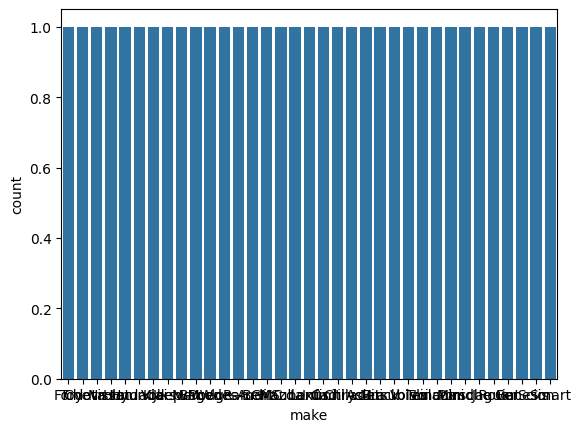

In [32]:
top_makes = df["make"].value_counts().reset_index()
print(top_makes)
#top_makes = top_makes.value_counts()
sns.countplot(data = top_makes, x='make' )
plt.show()
plt.close()